In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_excel("Datos.xlsx", sheet_name="Sheet1")
df

,Id,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,SE,FT,12253703,US,US,M,100
603,604,2022,Data Engineer,SE,FT,10025757,US,US,M,100
604,605,2022,Data Analyst,SE,FT,10264466,US,US,M,0
605,606,2022,Data Analyst,SE,FT,11935425,US,US,M,100


In [67]:
df.dtypes

Id                      object
Working_Year             int64
Designation             object
Experience              object
Employment_Status        int32
Salary_In_Rupees         int64
Employee_Location       object
Company_Location        object
Company_Size             int64
Remote_Working_Ratio     int64
dtype: object

*Primero se crea una variable que agrupe el df por Designation, posteriormente se procede a graficar*

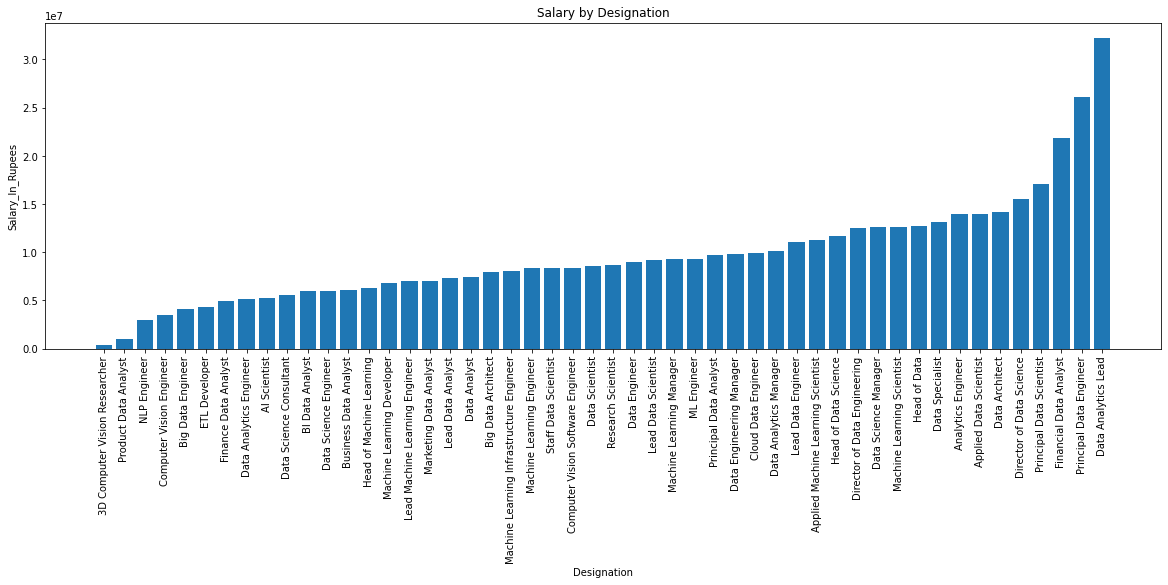

In [3]:
Agrupacion_Ocupacion = df.groupby("Designation").mean().sort_values("Salary_In_Rupees")
plt.figure(figsize=(20, 6))
plt.bar(Agrupacion_Ocupacion.index, Agrupacion_Ocupacion['Salary_In_Rupees'])
plt.xlabel('Designation')
plt.ylabel('Salary_In_Rupees')
plt.title('Salary by Designation')
plt.xticks(rotation=90)
plt.show()

*Si Company_Size == "S" se asigna un valor de 1*
*Si Company_Size == "M" se asigna un valor de 2*
*Si Company_Size == "L" se asigna un valor de 3*

In [73]:
df["Company_Size"] = df["Company_Size"].replace({"S": 1, "M": 2, "L": 3})
df

,Id,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272,DE,DE,3,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,1,0
2,3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,2,50
3,4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,1,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,SE,FT,12253703,US,US,2,100
603,604,2022,Data Engineer,SE,FT,10025757,US,US,2,100
604,605,2022,Data Analyst,SE,FT,10264466,US,US,2,0
605,606,2022,Data Analyst,SE,FT,11935425,US,US,2,100


In [57]:
df["Employment_Status"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: Employment_Status, dtype: int64

*PT == 0, FT == 1, CT == 2 y FL == 3*

In [74]:
df["Employment_Status"] = df["Employment_Status"].replace({'PT': 0, 'FT': 1, 'CT': 2, 'FL': 3})
df

,Id,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,1,6352272,DE,DE,3,0
1,2,2020,Machine Learning Scientist,SE,1,20688070,JP,JP,1,0
2,3,2020,Big Data Engineer,SE,1,8674985,GB,GB,2,50
3,4,2020,Product Data Analyst,MI,1,1591390,HN,HN,1,0
4,5,2020,Machine Learning Engineer,SE,1,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,SE,1,12253703,US,US,2,100
603,604,2022,Data Engineer,SE,1,10025757,US,US,2,100
604,605,2022,Data Analyst,SE,1,10264466,US,US,2,0
605,606,2022,Data Analyst,SE,1,11935425,US,US,2,100


*Validando si se hicieron los cambios*

In [62]:
df["Employment_Status"].value_counts()

1    588
0     10
2      5
3      4
Name: Employment_Status, dtype: int64

In [69]:
df["Experience"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: Experience, dtype: int64

In [75]:
import random
df["Experience"] = df["Experience"].replace({"EN": random.uniform(0,1), "MI": random.uniform(2,3),
                                            "SE": random.uniform(4,6), "EX": random.uniform(6.5,9)})
df

,Id,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,2.338738,1,6352272,DE,DE,3,0
1,2,2020,Machine Learning Scientist,5.141275,1,20688070,JP,JP,1,0
2,3,2020,Big Data Engineer,5.141275,1,8674985,GB,GB,2,50
3,4,2020,Product Data Analyst,2.338738,1,1591390,HN,HN,1,0
4,5,2020,Machine Learning Engineer,5.141275,1,11935425,US,US,3,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,5.141275,1,12253703,US,US,2,100
603,604,2022,Data Engineer,5.141275,1,10025757,US,US,2,100
604,605,2022,Data Analyst,5.141275,1,10264466,US,US,2,0
605,606,2022,Data Analyst,5.141275,1,11935425,US,US,2,100


In [76]:
df["Id"] = df["Id"].to_string()
df["Employment_Status"] = df["Employment_Status"].astype(int)
df.corr()

,Working_Year,Experience,Employment_Status,Salary_In_Rupees,Company_Size,Remote_Working_Ratio
Working_Year,1.000000,0.284267,-0.012819,0.170493,-0.078764,0.076314
Experience,0.284267,1.000000,0.071479,0.492619,0.050430,0.107735
Employment_Status,-0.012819,0.071479,1.000000,0.065747,0.027133,0.015638
Salary_In_Rupees,0.170493,0.492619,0.065747,1.000000,0.151205,0.132122
Company_Size,-0.078764,0.050430,0.027133,0.151205,1.000000,-0.022070
Remote_Working_Ratio,0.076314,0.107735,0.015638,0.132122,-0.022070,1.000000


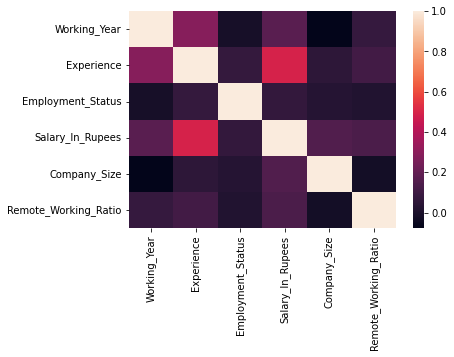

In [77]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

*Validando si hay valores nulos*

In [66]:
missing_values = df['Employment_Status'].isna().sum()
print(f"Number of missing values in Employment_Status column: {missing_values}")

Number of missing values in Employment_Status column: 0
